Temporal Difference (TD) Learning is a core method in Reinforcement Learning (RL) that combines ideas from Monte Carlo (MC) methods and Dynamic Programming (DP).

TD(0) is the simplest form of TD learning. It updates the value of a state 
𝑉
(
𝑠
)
V(s) based on:

The immediate reward received after taking an action.
The estimated value of the next state 
𝑉
(
𝑠
′
)
V(s 
′
 ).

TD(0) Update Rule:
For a given state 
𝑠, the value function 
V(s) is updated as:

V(s)←V(s)+α[r+γV(s)−V(s)]
Where:


V(s): Current estimate of the value of state 𝑠
α: Learning rate (how much we adjust based on the new information).
r: Reward received after transitioning from s to 𝑠′.
γ: Discount factor (weighting of future rewards).
𝑉(𝑠′): Value of the next state 𝑠′, which is also estimated.

Learned State-Value Function (V):
State 1: -4.61
State 2: -2.90
State 3: 0.01
State 4: 3.24
State 5: 0.00


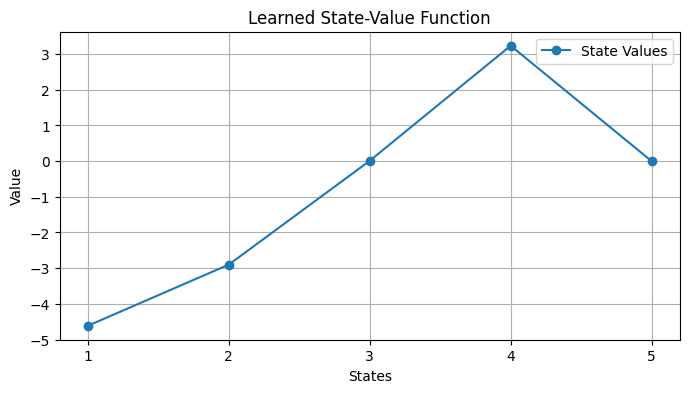

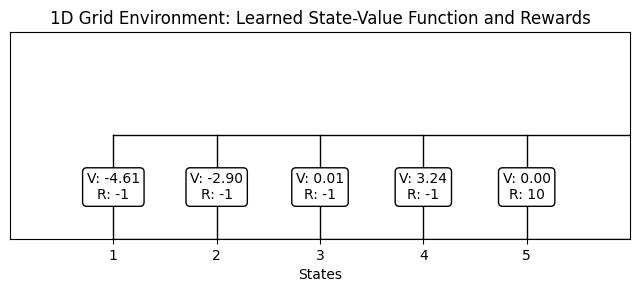

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Environment setup
num_states = 5
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
episodes = 500  # Number of episodes

# Initialize state-value function (V) for states 1 to 5
V = np.zeros(num_states + 1)  # Index 0 is unused for convenience

# Rewards function
def get_reward(state):
    return 10 if state == num_states else -1

# Define possible actions
actions = ['left', 'right']

# Transition function
def get_next_state(state, action):
    if action == 'left':
        return max(1, state - 1)
    elif action == 'right':
        return min(num_states, state + 1)
    return state

# TD(0) learning
for episode in range(episodes):
    state = 1  # Start at state 1
    while state != num_states:  # Continue until reaching the goal state
        # Choose a random action
        action = random.choice(actions)
        
        # Get next state and reward
        next_state = get_next_state(state, action)
        reward = get_reward(next_state)
        
        # Update state-value using TD(0)
        V[state] += alpha * (reward + gamma * V[next_state] - V[state])
        
        # Transition to next state
        state = next_state

# Print final state-value function
print("Learned State-Value Function (V):")
for s in range(1, num_states + 1):
    print(f"State {s}: {V[s]:.2f}")

# Plotting the state-value function
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_states + 1), V[1:], marker='o', label='State Values')
plt.title("Learned State-Value Function")
plt.xlabel("States")
plt.ylabel("Value")
plt.xticks(range(1, num_states + 1))
plt.grid()
plt.legend()
plt.show()



# Plotting the state-value function as a grid
plt.figure(figsize=(8, 4))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, num_states + 1)
plt.ylim(0, 2)

# Draw the grid
for s in range(1, num_states + 1):
    plt.plot([s, s], [0, 1], color='black', linewidth=1)
plt.plot([1, num_states + 1], [0, 0], color='black', linewidth=1)
plt.plot([1, num_states + 1], [1, 1], color='black', linewidth=1)

# Annotate grid with state values and rewards
for s in range(1, num_states + 1):
    plt.text(s, 0.5, f"V: {V[s]:.2f}\nR: {get_reward(s)}", 
             ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round", fc="white"))

plt.title("1D Grid Environment: Learned State-Value Function and Rewards")
plt.xticks(range(1, num_states + 1))
plt.yticks([])
plt.xlabel("States")
plt.grid(False)
plt.show()

